<a href="https://colab.research.google.com/github/dhchoi1457/untitled1/blob/master/Imbalance_Study_tmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import xgboost as xgb
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve, precision_score
import itertools

from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import auc, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb

In [ ]:
#read the data
df = pd.read_csv(train_path, encoding="cp949")
df.shape

(100233, 69)

In [ ]:
#범주형 확인 후 one-hot
#df.dtypes[df.dtypes == 'object']

#one-hot encoding & add to df
tmp = "OCCP_NAME_G"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "MATE_OCCP_NAME_G"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "LT1Y_PEOD_RATE"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "AGE"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "SEX"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "TEL_MBSP_GRAD"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "CBPT_MBSP_YN"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "PAYM_METD"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

tmp = "LINE_STUS"
df = pd.concat([df, pd.get_dummies(df[tmp],prefix=tmp)], axis=1);
df = df.drop(tmp,1)

df.loc[df['LAST_CHLD_AGE'].isnull(), 'LAST_CHLD_AGE'] = 0
df = df.drop('CUST_ID',1)

In [ ]:
# 데이터 import 및 간단한 전처리

# XGB , LR , SVM , DNN 모델 구조 확정

# metric은 f1 score

# imbalanced 개선 테스트 진행

import os

print (os.getcwd())

default_path = "/content/drive/My Drive/Colab Notebooks/data/"

train_path = default_path + "/UCI_Credit_Card.csv"
#test, No label

/content


In [ ]:
# 데이터 import 및 간단한 전처리

# XGB , LR , SVM , DNN 모델 구조 확정

# metric은 f1 score

# imbalanced 개선 테스트 진행

import os

print (os.getcwd())

default_path = "/content/drive/My Drive/Colab Notebooks/data/"

train_path = default_path + "/Data_set.csv"
#test, No label

/content


In [ ]:
# feature , target split
y = np.array(df.TARGET.tolist())     #classes: 1..fraud, 0..no fraud
df = df.drop('TARGET', 1)
X = np.array(df.as_matrix())   # features


#random_state=42


# train, val, test split
# 1,42가 LR 많이낮음


X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, train_size=0.8, stratify = y , random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, train_size=0.5, stratify = y_tmp, random_state=42)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#import collections
#print(collections.Counter(y_train))
#print(collections.Counter(y_val))
#print(collections.Counter(y_test))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def show_data(y_test, y_pred):
  print('Precision =     {:.3f}'.format(tp/(tp+fp)))


## Base 모델 성능 평가

### LR

In [ ]:
# model1 LR
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(random_state=42)
lr.fit(X_tr_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

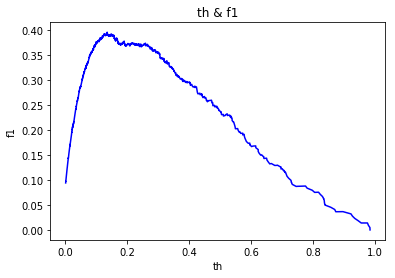

Val result
f1 : 0.39610389610389607 / thr: 0.1357679890201248


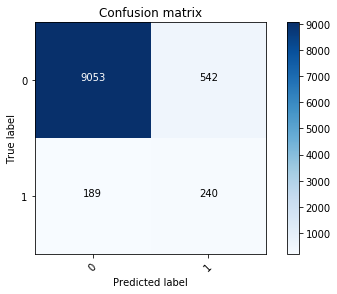

precision: 0.307
recall: 0.559
f1_score: 0.396


In [ ]:

#val 에서 th값 탐색
now_model = lr

#scores 값인지 잘 체크
y_pred = now_model.predict_proba(X_val_scaled)[:,1]

precision, recall, th = precision_recall_curve(y_val, y_pred)



f1 = 2*precision*recall/(precision+recall)
plt.plot(th, f1[1:], 'b', label='Precision-Recall curve')
plt.title('th & f1')
plt.xlabel('th')
plt.ylabel('f1')
plt.show()

#fix threshold
tmp = list(f1[1:])
ind = tmp.index(max(tmp))
thr_fixed = th[ind]
print("Val result")
print("f1 :",max(tmp), "/ thr:" ,thr_fixed)


#test_predicton
y_pred = now_model.predict_proba(X_test_scaled)[:,1]
y_pred [y_pred > thr_fixed] = 1
y_pred [y_pred <= thr_fixed] = 0

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, ['0', '1'], )

print('precision: {:2.3}'.format(precision_score(y_test, y_pred, average='binary')))
print('recall: {:2.3}'.format(recall_score(y_test, y_pred, average='binary')))
print('f1_score: {:2.3}'.format(f1_score(y_test, y_pred, average='binary')))



### RF

In [ ]:
# model_3.1 RF
# https://www.kaggle.com/andreanuzzo/balance-the-imbalanced-rf-and-xgboost-with-smote

from sklearn.ensemble import RandomForestClassifier

'''
model3_rf = RandomForestClassifier(n_jobs=-1, random_state = 42,
                             n_estimators=500, 
                             max_features='auto',
                             min_samples_leaf=2,
                             criterion = 'entropy')
'''
model3_rf = RandomForestClassifier(n_jobs=-1, random_state = 42, n_estimators=100) #, criterion = 'entropy')

model3_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

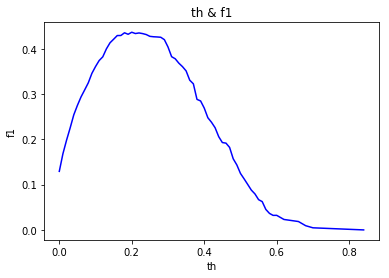

Val result
f1 : 0.43643263757115747 / thr: 0.2


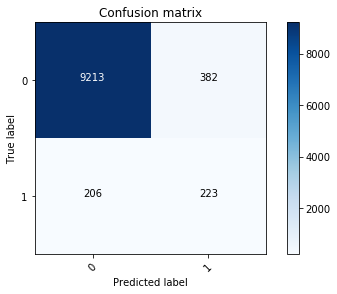

precision: 0.369
recall: 0.52
f1_score: 0.431


In [ ]:
#val 에서 th값 탐색
now_model = model3_rf

#scores 값인지 잘 체크
y_pred = now_model.predict_proba(X_val)[:,1]

precision, recall, th = precision_recall_curve(y_val, y_pred)



f1 = 2*precision*recall/(precision+recall)
plt.plot(th, f1[1:], 'b', label='Precision-Recall curve')
plt.title('th & f1')
plt.xlabel('th')
plt.ylabel('f1')
plt.show()

#fix threshold
tmp = list(f1[1:])
ind = tmp.index(max(tmp))
thr_fixed = th[ind]
print("Val result")
print("f1 :",max(tmp), "/ thr:" ,thr_fixed)


#test_predicton
y_pred = now_model.predict_proba(X_test)[:,1]
y_pred [y_pred > thr_fixed] = 1
y_pred [y_pred <= thr_fixed] = 0

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, ['0', '1'], )

print('precision: {:2.3}'.format(precision_score(y_test, y_pred, average='binary')))
print('recall: {:2.3}'.format(recall_score(y_test, y_pred, average='binary')))
print('f1_score: {:2.3}'.format(f1_score(y_test, y_pred, average='binary')))

In [ ]:
# model_4 XGB
#base prediction
xgdmat_train = xgb.DMatrix(X_train, y_train)
xgdmat_val = xgb.DMatrix(X_val, y_val)
xgdmat_test = xgb.DMatrix(X_test, y_test)

In [ ]:
params = {}
xgb_final = xgb.train(params, xgdmat_train)

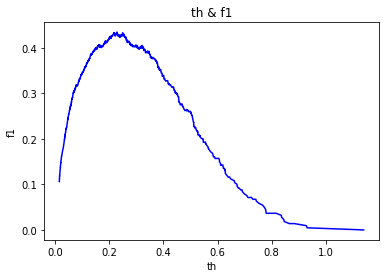

Val result
f1 : 0.4345991561181435 / thr: 0.22908574


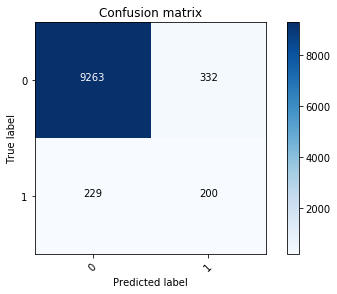

precision: 0.376
recall: 0.466
f1_score: 0.416


In [ ]:
#val 에서 th값 탐색
now_model = xgb_final

#scores 값인지 잘 체크
y_pred = now_model.predict(xgdmat_val)

precision, recall, th = precision_recall_curve(y_val, y_pred)



f1 = 2*precision*recall/(precision+recall)
plt.plot(th, f1[1:], 'b', label='Precision-Recall curve')
plt.title('th & f1')
plt.xlabel('th')
plt.ylabel('f1')
plt.show()

#fix threshold
tmp = list(f1[1:])
ind = tmp.index(max(tmp))
thr_fixed = th[ind]
print("Val result")
print("f1 :",max(tmp), "/ thr:" ,thr_fixed)


#test_predicton
y_pred = now_model.predict(xgdmat_test)
y_pred [y_pred > thr_fixed] = 1
y_pred [y_pred <= thr_fixed] = 0

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, ['0', '1'], )

print('precision: {:2.3}'.format(precision_score(y_test, y_pred, average='binary')))
print('recall: {:2.3}'.format(recall_score(y_test, y_pred, average='binary')))
print('f1_score: {:2.3}'.format(f1_score(y_test, y_pred, average='binary')))

### Balanced RF

In [ ]:
# model_5 Balanced RF
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
#best params
clf = BalancedRandomForestClassifier(n_jobs=-1, 
                                     random_state = 42)
                                     #,criterion = 'entropy')

clf.fit(X_train, y_train)

BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                               criterion='gini', max_depth=None,
                               max_features='auto', max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=-1, oob_score=False, random_state=42,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

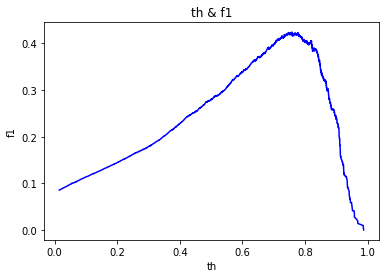

Val result
f1 : 0.423963133640553 / thr: 0.7576666666666668


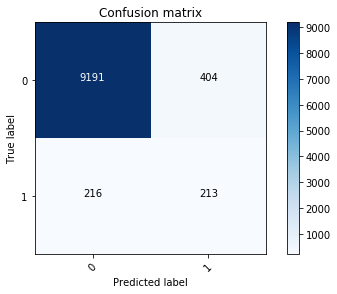

precision: 0.345
recall: 0.497
f1_score: 0.407


In [ ]:
#val 에서 th값 탐색
now_model = clf

#scores 값인지 잘 체크
y_pred = now_model.predict_proba(X_val)[:,1]

precision, recall, th = precision_recall_curve(y_val, y_pred)



f1 = 2*precision*recall/(precision+recall)
plt.plot(th, f1[1:], 'b', label='Precision-Recall curve')
plt.title('th & f1')
plt.xlabel('th')
plt.ylabel('f1')
plt.show()

#fix threshold
tmp = list(f1[1:])
ind = tmp.index(max(tmp))
thr_fixed = th[ind]
print("Val result")
print("f1 :",max(tmp), "/ thr:" ,thr_fixed)


#test_predicton
y_pred = now_model.predict_proba(X_test)[:,1]
y_pred [y_pred > thr_fixed] = 1
y_pred [y_pred <= thr_fixed] = 0

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, ['0', '1'], )

print('precision: {:2.3}'.format(precision_score(y_test, y_pred, average='binary')))
print('recall: {:2.3}'.format(recall_score(y_test, y_pred, average='binary')))
print('f1_score: {:2.3}'.format(f1_score(y_test, y_pred, average='binary')))

### IMB- XGB

In [ ]:
# model_6 IMB- XGB
!pip install imbalance-xgboost

In [ ]:
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb
from sklearn.model_selection import GridSearchCV

#search params
xgboster_focal = imb_xgb(special_objective='focal')
xgboster_weight = imb_xgb(special_objective='weighted')
CV_focal_booster = GridSearchCV(xgboster_focal, {"focal_gamma":[1.0,1.5,2.0,2.5,3.0]})

CV_weight_booster = GridSearchCV(xgboster_weight, {"imbalance_alpha":[1.5,2.0,2.5,3.0,4.0]})

CV_focal_booster.fit(X_train, y_train)
CV_weight_booster.fit(X_train, y_train)
opt_focal_booster = CV_focal_booster.best_estimator_
opt_weight_booster = CV_weight_booster.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


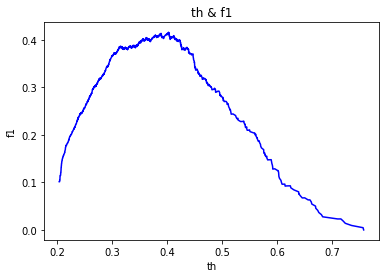

Val result
f1 : 0.4156171284634761 / thr: 0.40241283


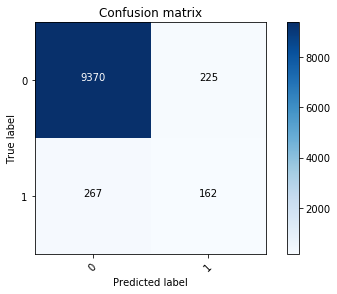

precision: 0.419
recall: 0.378
f1_score: 0.397


In [ ]:
#Focal model

#val 에서 th값 탐색
now_model = opt_focal_booster

#scores 값인지 잘 체크
y_pred = now_model.predict_sigmoid(X_val, y=None)

precision, recall, th = precision_recall_curve(y_val, y_pred)



f1 = 2*precision*recall/(precision+recall)
plt.plot(th, f1[1:], 'b', label='Precision-Recall curve')
plt.title('th & f1')
plt.xlabel('th')
plt.ylabel('f1')
plt.show()

#fix threshold
tmp = list(f1[1:])
ind = tmp.index(max(tmp))
thr_fixed = th[ind]
print("Val result")
print("f1 :",max(tmp), "/ thr:" ,thr_fixed)


#test_predicton
y_pred = now_model.predict_sigmoid(X_test, y=None)
y_pred [y_pred > thr_fixed] = 1
y_pred [y_pred <= thr_fixed] = 0

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, ['0', '1'], )

print('precision: {:2.3}'.format(precision_score(y_test, y_pred, average='binary')))
print('recall: {:2.3}'.format(recall_score(y_test, y_pred, average='binary')))
print('f1_score: {:2.3}'.format(f1_score(y_test, y_pred, average='binary')))

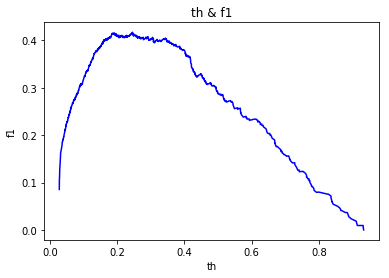

Val result
f1 : 0.41700404858299595 / thr: 0.24520724


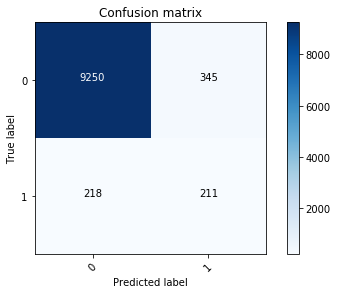

precision: 0.379
recall: 0.492
f1_score: 0.428


In [ ]:
#weight model

#val 에서 th값 탐색
now_model = opt_weight_booster

#scores 값인지 잘 체크
y_pred = now_model.predict_sigmoid(X_val, y=None)

precision, recall, th = precision_recall_curve(y_val, y_pred)



f1 = 2*precision*recall/(precision+recall)
plt.plot(th, f1[1:], 'b', label='Precision-Recall curve')
plt.title('th & f1')
plt.xlabel('th')
plt.ylabel('f1')
plt.show()

#fix threshold
tmp = list(f1[1:])
ind = tmp.index(max(tmp))
thr_fixed = th[ind]
print("Val result")
print("f1 :",max(tmp), "/ thr:" ,thr_fixed)


#test_predicton
y_pred = now_model.predict_sigmoid(X_test, y=None)
y_pred [y_pred > thr_fixed] = 1
y_pred [y_pred <= thr_fixed] = 0

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, ['0', '1'], )

print('precision: {:2.3}'.format(precision_score(y_test, y_pred, average='binary')))
print('recall: {:2.3}'.format(recall_score(y_test, y_pred, average='binary')))
print('f1_score: {:2.3}'.format(f1_score(y_test, y_pred, average='binary')))